#Neural Network - A Simple Perceptron

Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.

Answer:Deep learning is a specialized area of machine learning that uses multi-layered neural networks to learn patterns from large amounts of data. It grew from early neural network research in the 1980s and 1990s, but its real progress started when more powerful GPUs and massive datasets became available in the 2000s. This allowed deeper networks to be trained effectively. The main difference from traditional machine learning is that traditional methods usually require manual feature engineering, where humans decide which data characteristics are important. Deep learning removes this step by automatically learning useful features directly from raw data, making it more effective for complex tasks such as image classification, natural language processing, and speech recognition.


Question 2: Explain the basic architecture and functioning of a Perceptron. What are its
limitations?

Answer:A perceptron is the simplest form of an artificial neural network, made up of a single neuron. Its basic architecture includes inputs, weights, a bias, and an activation function. Each input is multiplied by a weight, and the weighted inputs are added together with the bias. This sum is then passed through an activation function, usually a step function, to produce an output of either 0 or 1. The perceptron learns by adjusting its weights based on errors during training. However, it has important limitations. A perceptron can only solve problems that are linearly separable, meaning it cannot learn more complex patterns such as the XOR problem. It also cannot capture non-linear relationships because it has no hidden layers.


Question 3: Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.

Answer:Activation functions in neural networks introduce non-linearity, allowing the model to learn complex patterns instead of just simple linear relationships. Without activation functions, a neural network would behave like a linear model no matter how many layers it has. Activation functions help control how signals flow through the network and influence how quickly and effectively the model learns.

The Sigmoid function outputs values between 0 and 1, making it useful for binary classification, but it can cause slow learning because its gradients become very small for large positive or negative inputs. The ReLU (Rectified Linear Unit) function outputs zero for negative values and the input itself for positive values. It is simple and helps networks train faster, but it can suffer from the “dying ReLU” problem where some neurons stop updating. The Tanh function is similar to Sigmoid but outputs values between –1 and 1, making it more centered around zero and often better for hidden layers. However, like Sigmoid, it can still face the problem of vanishing gradients.


Question 4: What is the difference between Loss function and Cost function in neural
networks? Provide examples.

Answer:The loss function and cost function are both used to measure how well a neural network is performing, but they differ in scope. A loss function calculates the error for a single training example, showing how far the model’s prediction is from that sample’s actual value. It is the immediate feedback signal used during training for each data point. In contrast, a cost function represents the overall error across the entire training dataset or a batch of examples. It is usually the average of all individual losses and is the value the optimization algorithm (like gradient descent) tries to minimize.

For example, in regression tasks, Mean Squared Error (MSE) is often used. The loss for one example is the squared difference between the predicted value and the actual value. The cost function is the average of these squared differences across all samples in the dataset. In classification tasks, Binary Cross-Entropy is used for binary classification. The loss for one sample measures how different the predicted probability is from the true label (0 or 1). The cost function is the average binary cross-entropy over all training examples. Similarly, Categorical Cross-Entropy is used for multi-class classification, where the loss is computed for each example and then averaged to form the cost. Overall, the loss function focuses on individual errors, while the cost function summarizes the model’s total performance during training.

Question 5: What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.

Answer:Optimizers play a crucial role in neural networks by adjusting the model’s weights to minimize the cost function during training. They determine how the network learns from errors and how quickly it converges to a good solution. Without optimizers, the model would not be able to update its parameters and improve performance. Optimizers use gradients (the direction of steepest change in the cost function) to decide how much and in which direction the weights should be changed after each training step.

**Gradient Descent** is the most basic optimizer. It updates weights by moving them in the opposite direction of the gradient of the cost function. While simple and effective, it can be slow because it uses the same learning rate for all parameters and struggles with complex or noisy landscapes. **RMSprop** improves on this by keeping a moving average of the squared gradients for each parameter. This allows it to adapt the learning rate individually, making learning faster and more stable, especially for problems with noisy or non-stationary data. **Adam** combines the ideas of RMSprop and another method called momentum. It tracks both the average of past gradients and the average of their squared values. This helps Adam adapt learning rates while also smoothing updates, leading to faster convergence and better performance in many deep learning tasks. In practice, Adam is often preferred because it works well with minimal tuning, while RMSprop is especially effective for recurrent networks, and Gradient Descent is mainly used for understanding the fundamentals or in simpler scenarios.


Question 6: Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.

(Include your Python code and output in the code box below.)

Answer:

In [1]:
import numpy as np

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

weights = np.zeros(2)
bias = 0
learning_rate = 0.1
epochs = 20

def activation(x):
    return 1 if x >= 0 else 0

for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        prediction = activation(linear_output)
        error = y[i] - prediction
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Final weights:", weights)
print("Final bias:", bias)

print("\nTesting Perceptron for AND Gate:")
for i in range(len(X)):
    linear_output = np.dot(X[i], weights) + bias
    prediction = activation(linear_output)
    print(f"Input: {X[i]}  Output: {prediction}")


Final weights: [0.2 0.1]
Final bias: -0.20000000000000004

Testing Perceptron for AND Gate:
Input: [0 0]  Output: 0
Input: [0 1]  Output: 0
Input: [1 0]  Output: 0
Input: [1 1]  Output: 1


Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.

(Include your Python code and output in the code box below.)

Answer:

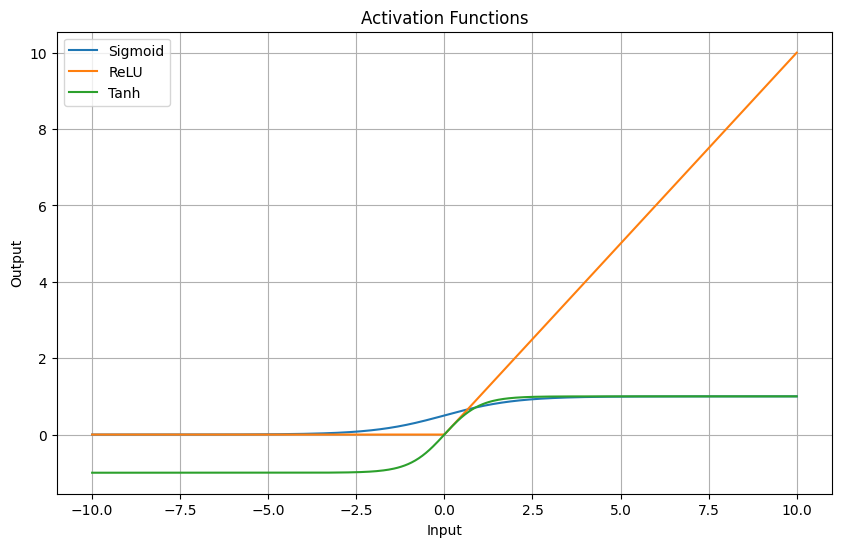

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)

plt.show()


Question 8: Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.

(Include your Python code and output in the code box below.)

Answer:

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

print("Training Accuracy:", history.history["accuracy"][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8753 - loss: 0.4253
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9678 - loss: 0.1089
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9782 - loss: 0.0725
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0510
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0400
Training Accuracy: 0.9863333106040955


Question 9: Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.

(Include your Python code and output in the code box below.)

Answer:

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7793 - loss: 0.6356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8606 - loss: 0.3780
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8790 - loss: 0.3320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8820 - loss: 0.3167
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8907 - loss: 0.2929
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8963 - loss: 0.2764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9013 - loss: 0.2646
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9061 - loss: 0.2512
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9090 - loss: 0.2420
Epoch 10/10
1875/1

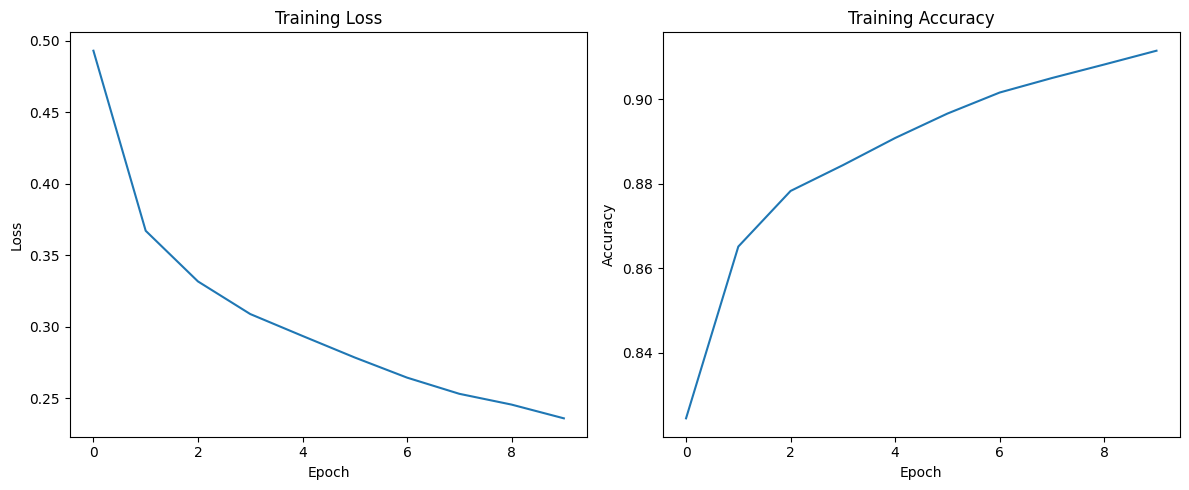

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


Question 10: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:

● How would you design a deep learning model (perceptron or multilayer NN)?

● Which activation function and loss function would you use, and why?

● How would you train and evaluate the model, considering class imbalance?

● Which optimizer would be suitable, and how would you prevent overfitting?

(Include your Python code and output in the code box below.)

Answer:1. Designing the Deep Learning Model

For a structured dataset with numerical and categorical features, a multilayer neural network (MLP) is suitable.
The model would include:

An input layer that accepts all preprocessed numerical features

Several dense (fully connected) hidden layers

Batch normalization to stabilize training

Dropout layers to reduce overfitting

A final output layer with 1 neuron for binary classification

This architecture works well because structured data does not require convolutional or recurrent networks.

2. Choosing Activation and Loss Functions

Hidden layers: Use ReLU, because it is simple, fast, and works well for deep networks.

Output layer: Use Sigmoid, since the output must be a probability between 0 and 1.

Loss function: Use Binary Cross-Entropy, which is the standard loss for binary classification tasks and works best when combined with sigmoid outputs.

3. Training and Evaluating the Model with Class Imbalance

Fraud detection datasets are heavily imbalanced (fraud cases are rare). To address this:

Use class weights to give higher importance to the minority class.

Split the dataset into training and testing sets to evaluate generalization.

Use Precision, Recall, and F1-score, not just accuracy, since accuracy can be misleading with imbalance.

Use a confusion matrix to see how many fraud cases are correctly identified.

4. Choosing an Optimizer and Preventing Overfitting

Use Adam optimizer, because it adapts the learning rate and performs well on structured data.

Prevent overfitting by:

Adding Dropout

Adding Batch Normalization

Using EarlyStopping to stop training when validation loss stops improving

Using a small number of epochs with validation monitoring

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.losses import BinaryCrossentropy

X = np.random.rand(20000, 20)
y = np.random.choice([0, 1], size=20000, p=[0.97, 0.03])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weights = class_weight.compute_class_weight(class_weight='balanced',
                                            classes=np.unique(y),
                                            y=y)
class_weights = {0: weights[0], 1: weights[1]}

model = Sequential([
    Dense(64, activation="relu", input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=["accuracy", Precision(), Recall()])

stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    class_weight=class_weights,
                    callbacks=[stop],
                    verbose=1)

loss, acc, prec, rec = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5021 - loss: 0.9072 - precision: 0.0282 - recall: 0.4630 - val_accuracy: 0.5516 - val_loss: 0.6854 - val_precision: 0.0239 - val_recall: 0.4250
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4694 - loss: 0.8030 - precision: 0.0295 - recall: 0.4919 - val_accuracy: 0.5537 - val_loss: 0.6788 - val_precision: 0.0233 - val_recall: 0.4125
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4720 - loss: 0.7697 - precision: 0.0398 - recall: 0.6148 - val_accuracy: 0.6044 - val_loss: 0.6659 - val_precision: 0.0225 - val_recall: 0.3500
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5042 - loss: 0.7197 - precision: 0.0367 - recall: 0.5856 - val_accuracy: 0.5534 - val_loss: 0.6833 - val_precision: 0.0300 - val_recall: 0.5375
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4752 - loss: 0.7382 - precision: 0.0367 - recall: 0.5779 - val_accuracy: 0.5713 - val_loss: 0.